In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# code to display rows and columns

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [6]:
df = pd.read_csv("loan.csv")

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Column info



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Problem Type

1) Given the number of  inputs the Machine learning Algorithm has to 
   predict the Loan_Status of an individual
   
2) Target Variable is Loan_Status

3) Solving it as a Classification problem

4) We have to build a model that can predict whether the loan of the  applicant will be approved or not

# Checking the data types

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Data types include:

- Object
- Int
- float

### Lets check for duplicate values

In [10]:
df.duplicated().sum()

0

### No duplicated values

### Lets check for missing values

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Some missing values in data:

- Gender : 13
- Married : 3
- Dependents : 15
- Self_Employed : 32
- LoanAmount : 22
- Loan_Amount_Term : 14
- Credit_History : 50

<AxesSubplot:>

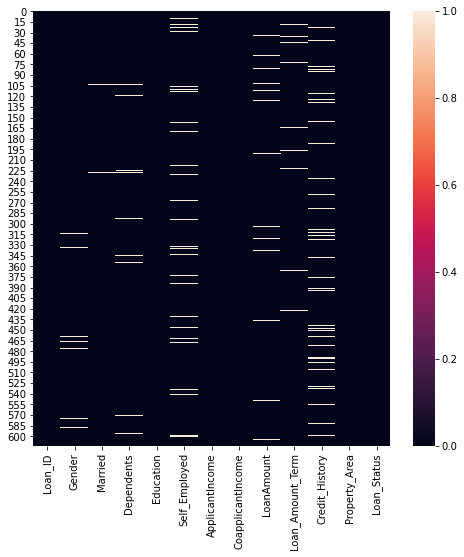

In [12]:
# Visualizing the missing values
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

### Data Shape

In [13]:
df.shape

(614, 13)

Rows : 614

Columns : 13

#### Data Descriptiion

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Overview of data:

- Applicant Income ranges from (150.0 to 81000.0)

- Coapplicant Income ranges between (0.0 to 41667.0)

- Loan Amount ranges between (9.0 to 700)

- Loan Amount Term ranges from (12 to 480)

# EDA

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
sns.set_theme(style="darkgrid")

<AxesSubplot:xlabel='Gender', ylabel='count'>

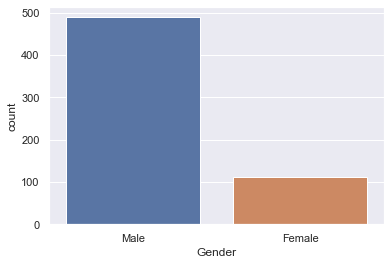

In [17]:
sns.countplot(x="Gender",data=df)

Observations from the above plot:

Most of the male applicants have applied for loan.

There are very few female applicants who have applied for loan.

<AxesSubplot:xlabel='Gender', ylabel='count'>

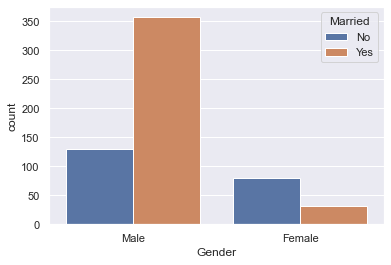

In [18]:
sns.countplot(x="Gender",hue="Married",data=df)

Observations from the above plot:

Most of the men who are married have applied for a loan

Very few married women have applied for a loan

So there are higher chances that if an individual is married has applied for a loan 

<AxesSubplot:xlabel='Gender', ylabel='count'>

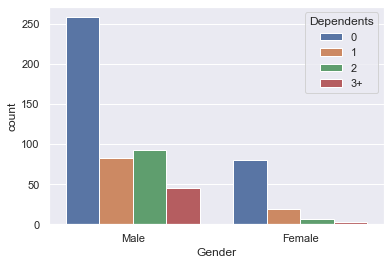

In [19]:
sns.countplot(x="Gender",hue="Dependents",data=df)

Observations from the above plot:

The male applicants are having more individuals dependent on them

The female applicants are having fewer applicants dependent on them

<AxesSubplot:xlabel='Gender', ylabel='count'>

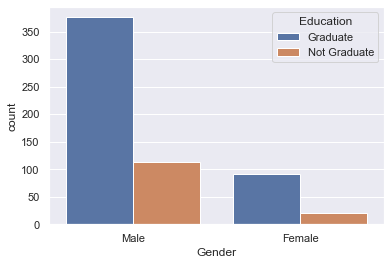

In [20]:
sns.countplot(x="Gender",hue="Education",data=df)

Observations from the above plot:

High graduation rate for both male and female loan applicants

So we can say that most of the people are educated

<AxesSubplot:xlabel='Gender', ylabel='count'>

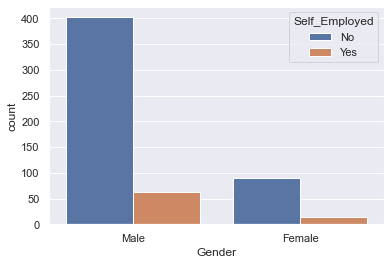

In [21]:
sns.countplot(x="Gender",hue="Self_Employed",data=df)

Observations from the above plot:

Very few male and female candidates are self-employed

The overall self-employment rate is low

<AxesSubplot:xlabel='Gender', ylabel='count'>

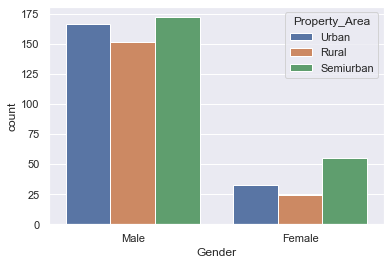

In [22]:
sns.countplot(x="Gender",hue="Property_Area",data=df)

Observations from the above plot:

The property area for most male candidates is Semi-Urban

Most of the female candidates originate from Semi-Urban property

<AxesSubplot:xlabel='Gender', ylabel='count'>

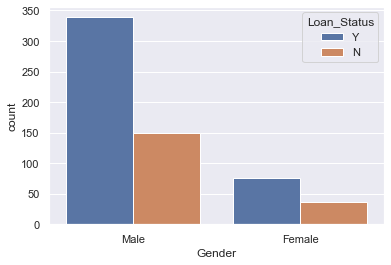

In [23]:
sns.countplot(x="Gender",hue="Loan_Status",data=df)

Observations from the above plot:

Most of the loan applications for both men and women have been approved

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

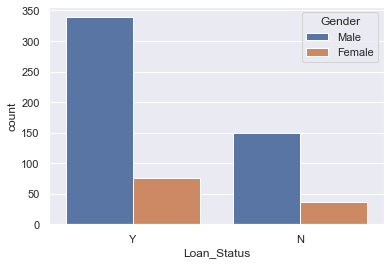

In [24]:
sns.countplot(x="Loan_Status",hue="Gender",data=df)

Observations from the above plot:

Most of the male candidates have their loan application approved

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

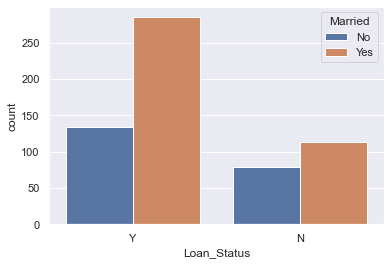

In [25]:
sns.countplot(x="Loan_Status",hue="Married",data=df)

Observations from the above plot:

Married individuals are having a high chance of their loan application being approved

we can say that if both Husband and wife are working then there is a high chance of repayment of the loan 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

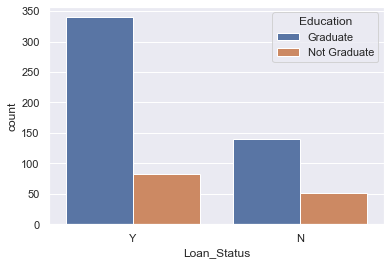

In [26]:
sns.countplot(x="Loan_Status",hue="Education",data=df)

Observations from the above plot:
    
We can assume that if an individual is educated then there is a good chance that he/she might have a job so an individual with a job has a higher chance of repaying their loan

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

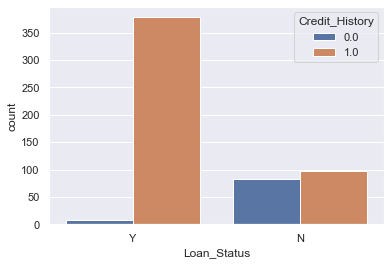

In [27]:
sns.countplot(x="Loan_Status",hue="Credit_History",data=df)

Observations from the above plot:

The more the transaction history an individual has higher are the chances of him/her getting a loan from the bank

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

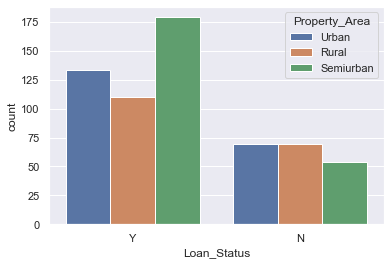

In [28]:
sns.countplot(x="Loan_Status",hue="Property_Area",data=df)

Observations from the above plot:

Individuals originating from semi-urban and urban area have the highest chance of loan approval 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

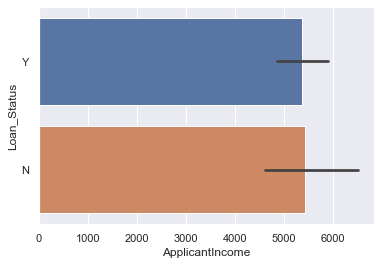

In [29]:
sns.barplot(y="Loan_Status",x="ApplicantIncome",data=df)

Observations from the above plot:

We can say that if an individual has high income then there is a less chance that he will take a loan

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

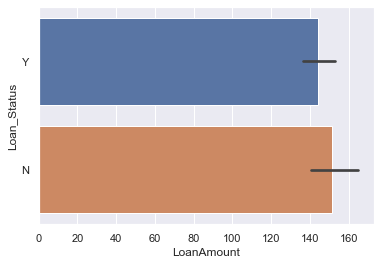

In [30]:
sns.barplot(y="Loan_Status",x="LoanAmount",data=df)

Observations from the above plot:

if the loan amount is exceeding 145 then there is a higher chance that the loan application might be rejected

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

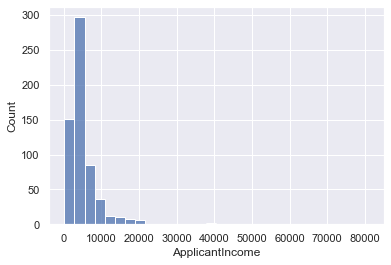

In [31]:
sns.histplot(x="ApplicantIncome",data=df,bins=30)

Observations from the above plot:

Most of the applicants have income within a range of (150,6000)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

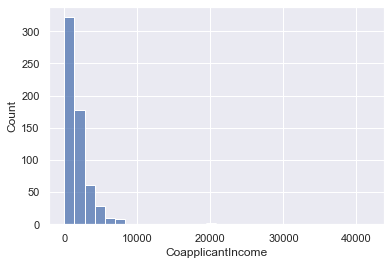

In [32]:
sns.histplot(x="CoapplicantIncome",data=df,bins=30)

Observations from the above plot:

The overall co applicant income rate is less as compared to the  Applicant income

# Data Cleaning

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Replacing the null values in gender with Mode of data

In [35]:
df["Gender"].mode()

0    Male
dtype: object

In [36]:
df["Gender"].isnull().sum()

13

In [37]:
df['Gender'] = df['Gender'].fillna("Male")

In [38]:
df["Gender"].isnull().sum()

0

In [39]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Replacing the null values in Married with Mode of data

In [40]:
df["Married"].isnull().sum()

3

In [41]:
df["Married"].mode()

0    Yes
dtype: object

In [42]:
df['Married'] = df['Married'].fillna("Yes")

In [43]:
df["Married"].isnull().sum()

0

In [44]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Replacing the null values in Dependents with Mode of data

In [46]:
df["Dependents"].isnull().sum()

15

In [47]:
df["Dependents"].mode()

0    0
dtype: object

In [48]:
df['Dependents'] = df['Dependents'].fillna("0")

In [49]:
df["Dependents"].isnull().sum()

0

In [50]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Replacing the null values in Self_Employed with Mode of data

In [51]:
df["Self_Employed"].isnull().sum()

32

In [52]:
df["Self_Employed"].mode()

0    No
dtype: object

In [53]:
df['Self_Employed'] = df['Self_Employed'].fillna("No")

In [54]:
df['Self_Employed'].isnull().sum()

0

In [55]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
df["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

Replacing the missing values in loan amount with median

In [57]:
df["LoanAmount"].median()

128.0

In [58]:
df['LoanAmount'] = df['LoanAmount'].fillna(128.0)

In [59]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
df["Loan_Amount_Term"].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [61]:
df["Loan_Amount_Term"].median()

360.0

Replacing the missing values in Loan_Amount_Term with median

In [62]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360.0)

In [63]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [64]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Replacing the missing values in Credit_History with median

In [65]:
df['Credit_History'].median()

1.0

In [66]:
df['Credit_History'] = df['Credit_History'].fillna(1.0)

In [67]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No more missing values in the dataframe

In [68]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Droping the Loan_id column

In [69]:
df = df.drop("Loan_ID",axis=1)

In [70]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Outliers

In [71]:
from scipy import stats
# creating function to count outliers
def outliers(cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    IQR = stats.iqr(df[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",df[df[cname] < L_outlier][cname].count())
    print("Right Outliers :",df[df[cname] > U_outlier][cname].count())

In [72]:
outliers("ApplicantIncome")

The first quartile : 2877.5 for ApplicantIncome
The third quartile : 5795.0 for ApplicantIncome
The IQR : 2917.5 for ApplicantIncome
The left outlier : -1498.75 for ApplicantIncome
The Right outlier : 10171.25 for ApplicantIncome
Left Outliers : 0
Right Outliers : 50


<AxesSubplot:xlabel='ApplicantIncome'>

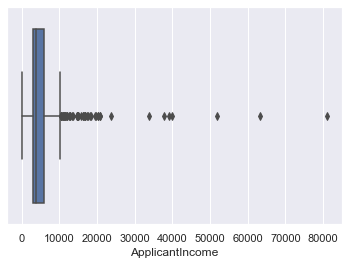

In [73]:
sns.boxplot(x="ApplicantIncome",data=df)

There are outliers in Applicant Income, but there is a huge possibility that those individuals can have that kind of income its very realistic

In [74]:
outliers("CoapplicantIncome")

The first quartile : 0.0 for CoapplicantIncome
The third quartile : 2297.25 for CoapplicantIncome
The IQR : 2297.25 for CoapplicantIncome
The left outlier : -3445.875 for CoapplicantIncome
The Right outlier : 5743.125 for CoapplicantIncome
Left Outliers : 0
Right Outliers : 18


<AxesSubplot:xlabel='CoapplicantIncome'>

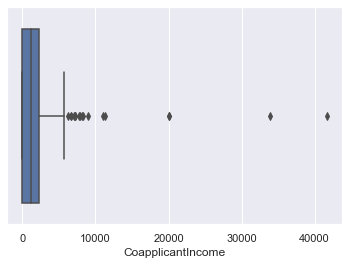

In [75]:
sns.boxplot(x="CoapplicantIncome",data=df)

There are a few outliers in Coapplicant Income

In [76]:
outliers("LoanAmount")

The first quartile : 100.25 for LoanAmount
The third quartile : 164.75 for LoanAmount
The IQR : 64.5 for LoanAmount
The left outlier : 3.5 for LoanAmount
The Right outlier : 261.5 for LoanAmount
Left Outliers : 0
Right Outliers : 41


<AxesSubplot:xlabel='LoanAmount'>

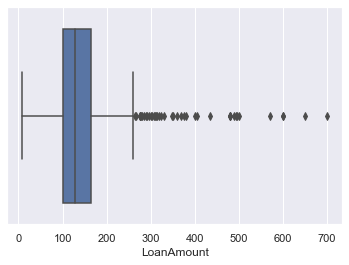

In [77]:
sns.boxplot(x="LoanAmount",data=df)

There are a few outliers in Loan Amount

In [78]:
outliers("Loan_Amount_Term")

The first quartile : 360.0 for Loan_Amount_Term
The third quartile : 360.0 for Loan_Amount_Term
The IQR : 0.0 for Loan_Amount_Term
The left outlier : 360.0 for Loan_Amount_Term
The Right outlier : 360.0 for Loan_Amount_Term
Left Outliers : 73
Right Outliers : 15


<AxesSubplot:xlabel='Loan_Amount_Term'>

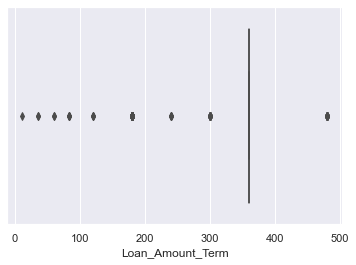

In [79]:
sns.boxplot(x="Loan_Amount_Term",data=df)

Creating seprate variables for categorical and continuous columns

In [80]:
df_cont = df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]]

In [81]:
df_cont.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [82]:
df_cata = df.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [83]:
df_cata.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


<AxesSubplot:>

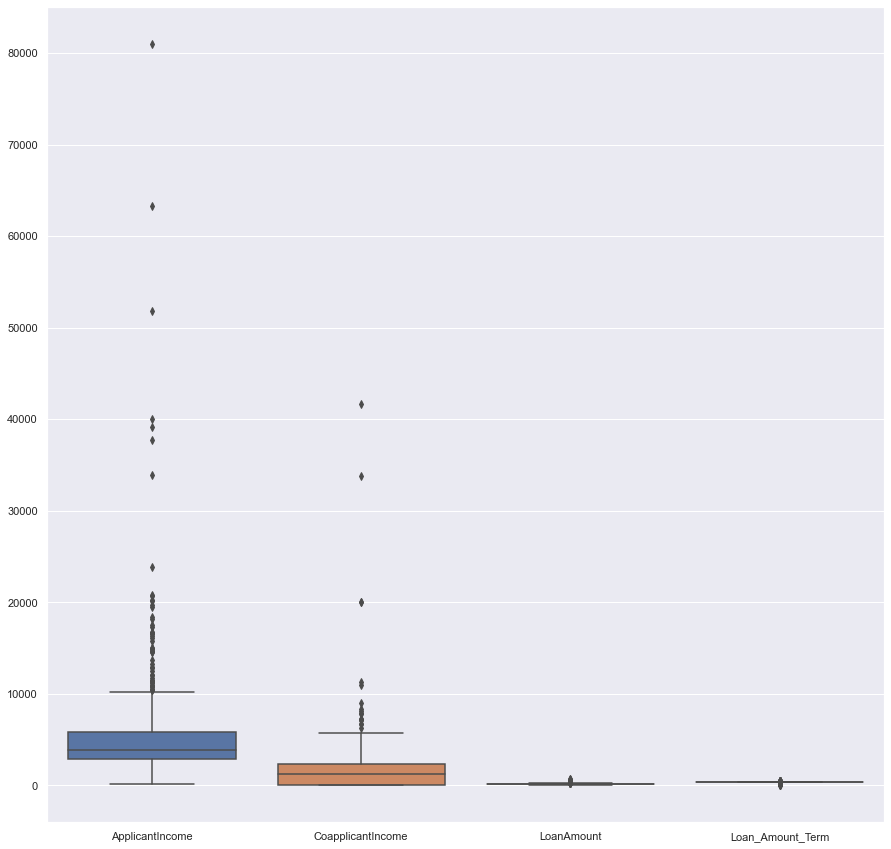

In [84]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df_cont)

We can clearly observe the outliers we need to reduce them

## Removing Outliers

#### Z score technique

In [85]:
from scipy.stats import zscore

In [86]:
z = np.abs(zscore(df_cont))

In [87]:
z.shape

(614, 4)

In [88]:
threshhold = 3
print(np.where(z > 3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
      dtype=int64))


In [89]:
df_new = df[(z < 3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(614, 12)
(577, 12)


### Percentage data loss 

In [90]:
loss = (614-577)/614*100

In [91]:
print("The data loss is ",round(loss,1)," %")

The data loss is  6.0  %


Considering the amount of outliers and size of the Data set we can go ahead with 6% loss of data

In [92]:
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Checking Skewness

In [93]:
df_cont = df_new[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]]

In [94]:
df_cont.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [95]:
df_cata = df_new.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [96]:
df_cata.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


Skewness is only valid in continuous variables

In [97]:
df_cont.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
dtype: float64

### Log Transformation

In [98]:
df_cont.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [99]:
df_cont["ApplicantIncome"] = np.log(df_cont["ApplicantIncome"]+1)

In [100]:
df_cont["ApplicantIncome"].skew()

-0.20491277344947714

In [101]:
df_cont["CoapplicantIncome"] = np.log(df_cont["CoapplicantIncome"]+1)

In [102]:
df_cont["CoapplicantIncome"].skew()

-0.21675695794770106

In [103]:
df_cont["LoanAmount"] = np.log(df_cont["LoanAmount"]+1)

In [104]:
df_cont["LoanAmount"].skew()

-0.6691962490193747

Skewness has been reduced

### Encoding

In [105]:
df_cont.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,8.674197,0.000000,4.859812,360.0
1,8.430327,7.319202,4.859812,360.0
2,8.006701,0.000000,4.204693,360.0
3,7.857094,7.765993,4.795791,360.0
4,8.699681,0.000000,4.955827,360.0


In [106]:
df_cata.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [107]:
df_cata['Loan_Status'] = [0 if x == "N" else 1 for x in df_cata['Loan_Status']]

In [108]:
df_cata.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,1
1,Male,Yes,1,Graduate,No,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1
4,Male,No,0,Graduate,No,1.0,Urban,1


In [109]:
df_cata["Loan_Status"].value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [110]:
df_cata = pd.get_dummies(data=df_cata,drop_first=True)

In [111]:
df_cata.head()

,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,1,0,0,0,0,0,0,0,1
1,1.0,0,1,1,1,0,0,0,0,0,0
2,1.0,1,1,1,0,0,0,0,1,0,1
3,1.0,1,1,1,0,0,0,1,0,0,1
4,1.0,1,1,0,0,0,0,0,0,0,1


In [112]:
df = pd.concat([df_cont,df_cata],axis=1)

In [113]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.859812,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,7.857094,7.765993,4.795791,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,8.699681,0.000000,4.955827,360.0,1.0,1,1,0,0,0,0,0,0,0,1


### Correlation

In [114]:
cor = df.corr()

<AxesSubplot:>

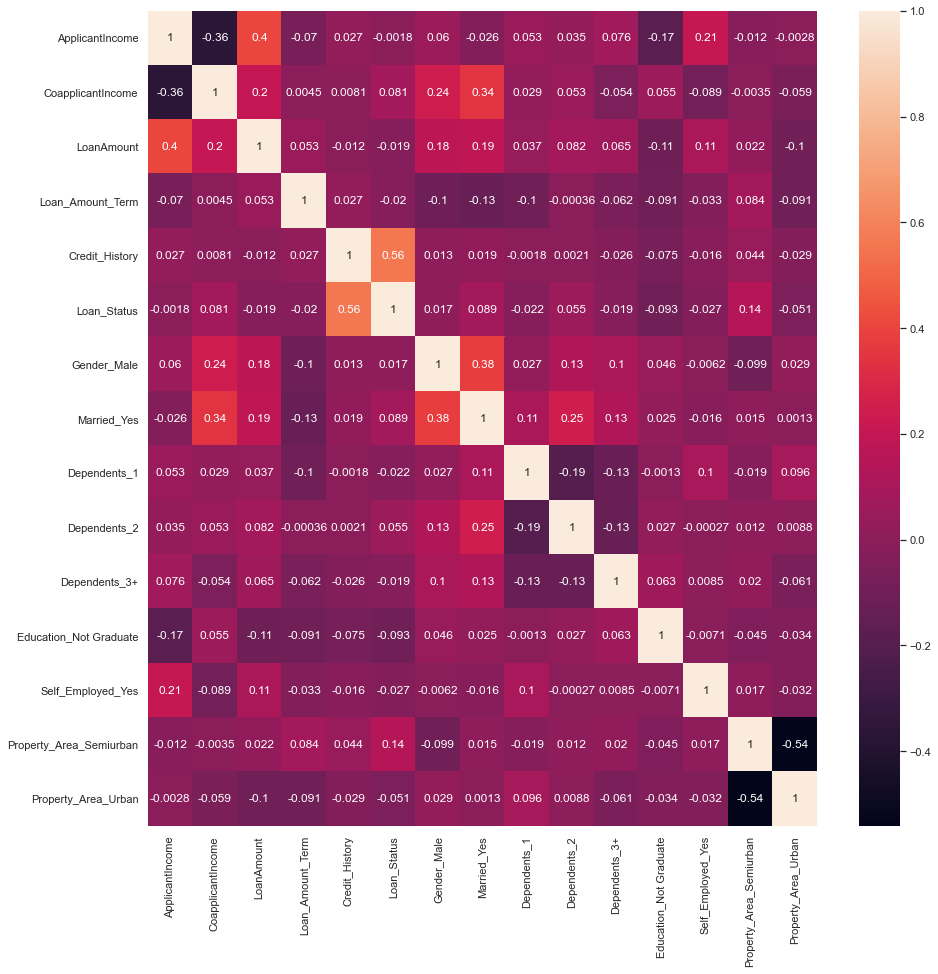

In [115]:
plt.figure(figsize=(15,15))
sns.heatmap(data=cor,annot=True)

Checking the best correlation with target variable

In [116]:
cor["Loan_Status"].sort_values(ascending=False)

Loan_Status                1.000000
Credit_History             0.560936
Property_Area_Semiurban    0.141686
Married_Yes                0.089026
CoapplicantIncome          0.081455
Dependents_2               0.055274
Gender_Male                0.017408
ApplicantIncome           -0.001761
LoanAmount                -0.018683
Dependents_3+             -0.019058
Loan_Amount_Term          -0.020291
Dependents_1              -0.021897
Self_Employed_Yes         -0.026525
Property_Area_Urban       -0.050830
Education_Not Graduate    -0.092658
Name: Loan_Status, dtype: float64

We can clearly observe that Credit_History,Property_Area_Semiurban and Married_Yes are having good correlation with the target variable

## Train Test Split

In [117]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.859812,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,7.857094,7.765993,4.795791,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,8.699681,0.000000,4.955827,360.0,1.0,1,1,0,0,0,0,0,0,0,1


In [118]:
X = df.drop("Loan_Status",axis=1)
y = df["Loan_Status"]

In [119]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.859812,360.0,1.0,1,0,0,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,360.0,1.0,1,1,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,360.0,1.0,1,1,0,0,0,0,1,0,1
3,7.857094,7.765993,4.795791,360.0,1.0,1,1,0,0,0,1,0,0,1
4,8.699681,0.000000,4.955827,360.0,1.0,1,0,0,0,0,0,0,0,1


In [120]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [121]:
X =X.values
y = y.values

In [122]:
X

array([[8.67419694, 0.        , 4.8598124 , ..., 0.        , 0.        ,
        1.        ],
       [8.43032726, 7.31920246, 4.8598124 , ..., 0.        , 0.        ,
        0.        ],
       [8.00670085, 0.        , 4.20469262, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [8.99628044, 5.48479693, 5.53733427, ..., 0.        , 0.        ,
        1.        ],
       [8.93379604, 0.        , 5.23644196, ..., 0.        , 0.        ,
        1.        ],
       [8.43032726, 0.        , 4.8978398 , ..., 1.        , 1.        ,
        0.        ]])

In [123]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [126]:
X_train.shape

(432, 14)

In [127]:
X_test.shape

(145, 14)

## Scaling

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
sc = MinMaxScaler()

In [130]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [131]:
X_train

array([[0.5712392 , 0.        , 0.28229127, ..., 0.        , 0.        ,
        0.        ],
       [0.57683544, 0.91157373, 0.65531758, ..., 1.        , 0.        ,
        0.        ],
       [0.55662217, 0.86293872, 0.61358786, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61815259, 0.88880368, 0.45485072, ..., 0.        , 0.        ,
        0.        ],
       [0.81538694, 0.        , 0.67457227, ..., 0.        , 1.        ,
        0.        ],
       [0.87936815, 0.77838254, 0.80269295, ..., 0.        , 0.        ,
        1.        ]])

In [132]:
X_test

array([[0.53879098, 1.00828167, 0.61633545, ..., 0.        , 1.        ,
        0.        ],
       [0.5399288 , 0.89528386, 0.71461116, ..., 0.        , 1.        ,
        0.        ],
       [0.6088701 , 0.71978412, 0.5058221 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.51565339, 0.86053068, 0.56666979, ..., 0.        , 0.        ,
        1.        ],
       [0.79824526, 0.        , 0.51308754, ..., 0.        , 0.        ,
        1.        ],
       [0.79619167, 0.        , 0.73314416, ..., 0.        , 0.        ,
        1.        ]])

## Machine Learning

### Logistic regression

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [135]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_1 = LogisticRegression() 
    mod_1.fit(X_train,y_train)
    train_score_1 = mod_1.score(X_train,y_train)
    pred_1 = mod_1.predict(X_test)
    test_score_1 = accuracy_score(y_test,pred_1)
    
    print("for random state ",i," The training accuracy is :",train_score_1)
    print("for random state ",i," The testing accuracy is :",test_score_1)
    print("\n")

for random state  0  The training accuracy is : 0.8194444444444444
for random state  0  The testing accuracy is : 0.8137931034482758


for random state  1  The training accuracy is : 0.8125
for random state  1  The testing accuracy is : 0.8275862068965517


for random state  2  The training accuracy is : 0.8194444444444444
for random state  2  The testing accuracy is : 0.8137931034482758


for random state  3  The training accuracy is : 0.8240740740740741
for random state  3  The testing accuracy is : 0.8


for random state  4  The training accuracy is : 0.8333333333333334
for random state  4  The testing accuracy is : 0.7724137931034483


for random state  5  The training accuracy is : 0.8263888888888888
for random state  5  The testing accuracy is : 0.7862068965517242


for random state  6  The training accuracy is : 0.8287037037037037
for random state  6  The testing accuracy is : 0.7931034482758621


for random state  7  The training accuracy is : 0.8263888888888888
for random stat

for random state  65  The training accuracy is : 0.8310185185185185
for random state  65  The testing accuracy is : 0.7793103448275862


for random state  66  The training accuracy is : 0.8194444444444444
for random state  66  The testing accuracy is : 0.8206896551724138


for random state  67  The training accuracy is : 0.8333333333333334
for random state  67  The testing accuracy is : 0.7655172413793103


for random state  68  The training accuracy is : 0.8032407407407407
for random state  68  The testing accuracy is : 0.8896551724137931


for random state  69  The training accuracy is : 0.8217592592592593
for random state  69  The testing accuracy is : 0.8068965517241379


for random state  70  The training accuracy is : 0.8425925925925926
for random state  70  The testing accuracy is : 0.7448275862068966


for random state  71  The training accuracy is : 0.8055555555555556
for random state  71  The testing accuracy is : 0.8551724137931035


for random state  72  The training accura

In [136]:
# Taking 15 as best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
mod_1 = LogisticRegression()
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = accuracy_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)


The training accuracy is : 0.8194444444444444
The testing accuracy is : 0.8275862068965517


In [137]:
print(confusion_matrix(y_test,pred_1))
print("\n")
print(classification_report(y_test,pred_1))
print("\n")

[[ 15  24]
 [  1 105]]


              precision    recall  f1-score   support

           0       0.94      0.38      0.55        39
           1       0.81      0.99      0.89       106

    accuracy                           0.83       145
   macro avg       0.88      0.69      0.72       145
weighted avg       0.85      0.83      0.80       145





## Stratified Validation

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [139]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [140]:
kfold_accuracy_LR

0.8163944343617665

In [141]:
score = {"Algorithm":["Logistic Regression"],
         "Training_Acc":[train_score_1],
        "Accuracy":[test_score_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [142]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.819444,0.827586,0.816394


## Naive Bayes

In [143]:
from sklearn.naive_bayes import GaussianNB

In [144]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_2 = GaussianNB() 
    mod_2.fit(X_train,y_train)
    train_score_2 = mod_2.score(X_train,y_train)
    pred_2 = mod_2.predict(X_test)
    test_score_2 = accuracy_score(y_test,pred_2)
    
    print("for random state ",i," The training accuracy is :",train_score_2)
    print("for random state ",i," The testing accuracy is :",test_score_2)
    print("\n")

for random state  0  The training accuracy is : 0.8194444444444444
for random state  0  The testing accuracy is : 0.8137931034482758


for random state  1  The training accuracy is : 0.8101851851851852
for random state  1  The testing accuracy is : 0.8206896551724138


for random state  2  The training accuracy is : 0.8217592592592593
for random state  2  The testing accuracy is : 0.8068965517241379


for random state  3  The training accuracy is : 0.8055555555555556
for random state  3  The testing accuracy is : 0.7517241379310344


for random state  4  The training accuracy is : 0.8310185185185185
for random state  4  The testing accuracy is : 0.7724137931034483


for random state  5  The training accuracy is : 0.8240740740740741
for random state  5  The testing accuracy is : 0.7586206896551724


for random state  6  The training accuracy is : 0.8101851851851852
for random state  6  The testing accuracy is : 0.7103448275862069


for random state  7  The training accuracy is : 0.83101

In [145]:
# Taking 36 as best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=36)
mod_2 = GaussianNB() 
mod_2.fit(X_train,y_train)
train_score_2 = mod_2.score(X_train,y_train)
pred_2 = mod_2.predict(X_test)
test_score_2 = accuracy_score(y_test,pred_2)
    
print("The training accuracy is :",train_score_2)
print("The testing accuracy is :",test_score_2)
print("\n")

The training accuracy is : 0.8148148148148148
The testing accuracy is : 0.8206896551724138




In [146]:
print(confusion_matrix(y_test,pred_2))
print("\n")
print(classification_report(y_test,pred_2))
print("\n")

[[ 19  24]
 [  2 100]]


              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.81      0.98      0.88       102

    accuracy                           0.82       145
   macro avg       0.86      0.71      0.74       145
weighted avg       0.84      0.82      0.80       145





## Stratified Crossvalidation

In [147]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_2,X,y,cv=kfold)

kfold_accuracy_NB = np.mean(abs(K_results))

In [148]:
kfold_accuracy_NB

0.8094071385359951

In [149]:
score = {"Algorithm":["Logistic Regression","Naive Bayes"],
         "Training_Acc":[train_score_1,train_score_2],
        "Accuracy":[test_score_1,test_score_2],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB]}

final_card = pd.DataFrame(score)

In [150]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.819444,0.827586,0.816394
1,Naive Bayes,0.814815,0.820690,0.809407


##  Random_forest_classification

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_3 = RandomForestClassifier() 
    mod_3.fit(X_train,y_train)
    train_score_3 = mod_3.score(X_train,y_train)
    pred_3 = mod_3.predict(X_test)
    test_score_3 = accuracy_score(y_test,pred_3)
    
    print("for random state ",i," The training accuracy is :",train_score_3)
    print("for random state ",i," The testing accuracy is :",test_score_3)
    print("\n")

for random state  0  The training accuracy is : 1.0
for random state  0  The testing accuracy is : 0.8


for random state  1  The training accuracy is : 1.0
for random state  1  The testing accuracy is : 0.7931034482758621


for random state  2  The training accuracy is : 1.0
for random state  2  The testing accuracy is : 0.8068965517241379


for random state  3  The training accuracy is : 1.0
for random state  3  The testing accuracy is : 0.8


for random state  4  The training accuracy is : 1.0
for random state  4  The testing accuracy is : 0.7586206896551724


for random state  5  The training accuracy is : 1.0
for random state  5  The testing accuracy is : 0.7517241379310344


for random state  6  The training accuracy is : 1.0
for random state  6  The testing accuracy is : 0.7655172413793103


for random state  7  The training accuracy is : 1.0
for random state  7  The testing accuracy is : 0.7793103448275862


for random state  8  The training accuracy is : 1.0
for random state  

for random state  70  The training accuracy is : 1.0
for random state  70  The testing accuracy is : 0.7379310344827587


for random state  71  The training accuracy is : 1.0
for random state  71  The testing accuracy is : 0.8551724137931035


for random state  72  The training accuracy is : 1.0
for random state  72  The testing accuracy is : 0.7793103448275862


for random state  73  The training accuracy is : 1.0
for random state  73  The testing accuracy is : 0.7862068965517242


for random state  74  The training accuracy is : 1.0
for random state  74  The testing accuracy is : 0.7586206896551724


for random state  75  The training accuracy is : 1.0
for random state  75  The testing accuracy is : 0.8137931034482758


for random state  76  The training accuracy is : 1.0
for random state  76  The testing accuracy is : 0.7862068965517242


for random state  77  The training accuracy is : 1.0
for random state  77  The testing accuracy is : 0.8


for random state  78  The training accu

In [153]:
# Taking the best random state as 39
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=39)
mod_3 = RandomForestClassifier() 
mod_3.fit(X_train,y_train)
train_score_3 = mod_3.score(X_train,y_train)
pred_3 = mod_3.predict(X_test)
test_score_3 = accuracy_score(y_test,pred_3)
    
print("The training accuracy is :",train_score_3)
print("The testing accuracy is :",test_score_3)
print("\n")

The training accuracy is : 1.0
The testing accuracy is : 0.8620689655172413




In [154]:
print(confusion_matrix(y_test,pred_3))
print("\n")
print(classification_report(y_test,pred_3))
print("\n")

[[28 15]
 [ 5 97]]


              precision    recall  f1-score   support

           0       0.85      0.65      0.74        43
           1       0.87      0.95      0.91       102

    accuracy                           0.86       145
   macro avg       0.86      0.80      0.82       145
weighted avg       0.86      0.86      0.86       145





## Stratified Cross Validation

In [155]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_3,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [156]:
kfold_accuracy_RFR

0.7886267392619479

In [157]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3],
        "Accuracy":[test_score_1,test_score_2,test_score_3],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [158]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.819444,0.827586,0.816394
1,Naive Bayes,0.814815,0.820690,0.809407
2,Random Forest Classi,1.000000,0.862069,0.788627


##  Decision Tree

In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_4 = DecisionTreeClassifier() 
    mod_4.fit(X_train,y_train)
    train_score_4 = mod_4.score(X_train,y_train)
    pred_4 = mod_4.predict(X_test)
    test_score_4 = accuracy_score(y_test,pred_4)
    
    print("for random state ",i," The training accuracy is :",train_score_4)
    print("for random state ",i," The testing accuracy is :",test_score_4)
    print("\n")

for random state  0  The training accuracy is : 1.0
for random state  0  The testing accuracy is : 0.7448275862068966


for random state  1  The training accuracy is : 1.0
for random state  1  The testing accuracy is : 0.6689655172413793


for random state  2  The training accuracy is : 1.0
for random state  2  The testing accuracy is : 0.7379310344827587


for random state  3  The training accuracy is : 1.0
for random state  3  The testing accuracy is : 0.6413793103448275


for random state  4  The training accuracy is : 1.0
for random state  4  The testing accuracy is : 0.7310344827586207


for random state  5  The training accuracy is : 1.0
for random state  5  The testing accuracy is : 0.6620689655172414


for random state  6  The training accuracy is : 1.0
for random state  6  The testing accuracy is : 0.696551724137931


for random state  7  The training accuracy is : 1.0
for random state  7  The testing accuracy is : 0.6896551724137931


for random state  8  The training accurac

In [161]:
# Taking 21 as best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
mod_4 = DecisionTreeClassifier() 
mod_4.fit(X_train,y_train)
train_score_4 = mod_4.score(X_train,y_train)
pred_4 = mod_4.predict(X_test)
test_score_4 = accuracy_score(y_test,pred_4)
    
print("The training accuracy is :",train_score_4)
print("The testing accuracy is :",test_score_4)
print("\n")

The training accuracy is : 1.0
The testing accuracy is : 0.7862068965517242




In [162]:
print(confusion_matrix(y_test,pred_4))
print("\n")
print(classification_report(y_test,pred_4))
print("\n")

[[26 18]
 [13 88]]


              precision    recall  f1-score   support

           0       0.67      0.59      0.63        44
           1       0.83      0.87      0.85       101

    accuracy                           0.79       145
   macro avg       0.75      0.73      0.74       145
weighted avg       0.78      0.79      0.78       145





## Stratified Cross Validation

In [163]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_4,X,y,cv=kfold)

kfold_accuracy_DT = np.mean(abs(K_results))

In [164]:
kfold_accuracy_DT

0.7436176648517845

In [165]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT]}

final_card = pd.DataFrame(score)

In [166]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.819444,0.827586,0.816394
1,Naive Bayes,0.814815,0.820690,0.809407
2,Random Forest Classi,1.000000,0.862069,0.788627
3,Decision Tree,1.000000,0.786207,0.743618


## AdaBoost

In [167]:
from sklearn.ensemble import AdaBoostClassifier

In [168]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_6 = AdaBoostClassifier() 
    mod_6.fit(X_train,y_train)
    train_score_6 = mod_6.score(X_train,y_train)
    pred_6 = mod_6.predict(X_test)
    test_score_6 = accuracy_score(y_test,pred_6)
    
    print("for random state ",i," The training accuracy is :",train_score_6)
    print("for random state ",i," The testing accuracy is :",test_score_6)
    print("\n")

for random state  0  The training accuracy is : 0.8611111111111112
for random state  0  The testing accuracy is : 0.7862068965517242


for random state  1  The training accuracy is : 0.8518518518518519
for random state  1  The testing accuracy is : 0.7862068965517242


for random state  2  The training accuracy is : 0.8564814814814815
for random state  2  The testing accuracy is : 0.7655172413793103


for random state  3  The training accuracy is : 0.8611111111111112
for random state  3  The testing accuracy is : 0.7724137931034483


for random state  4  The training accuracy is : 0.8703703703703703
for random state  4  The testing accuracy is : 0.7724137931034483


for random state  5  The training accuracy is : 0.8703703703703703
for random state  5  The testing accuracy is : 0.7517241379310344


for random state  6  The training accuracy is : 0.8518518518518519
for random state  6  The testing accuracy is : 0.7793103448275862


for random state  7  The training accuracy is : 0.86805

for random state  61  The training accuracy is : 0.8541666666666666
for random state  61  The testing accuracy is : 0.7931034482758621


for random state  62  The training accuracy is : 0.8564814814814815
for random state  62  The testing accuracy is : 0.7862068965517242


for random state  63  The training accuracy is : 0.8495370370370371
for random state  63  The testing accuracy is : 0.7931034482758621


for random state  64  The training accuracy is : 0.8634259259259259
for random state  64  The testing accuracy is : 0.7931034482758621


for random state  65  The training accuracy is : 0.8703703703703703
for random state  65  The testing accuracy is : 0.7655172413793103


for random state  66  The training accuracy is : 0.8449074074074074
for random state  66  The testing accuracy is : 0.8


for random state  67  The training accuracy is : 0.8611111111111112
for random state  67  The testing accuracy is : 0.7793103448275862


for random state  68  The training accuracy is : 0.84259

In [169]:
# Taking the best random state as 12
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
mod_6 = AdaBoostClassifier() 
mod_6.fit(X_train,y_train)
train_score_6 = mod_6.score(X_train,y_train)
pred_6 = mod_6.predict(X_test)
test_score_6 = accuracy_score(y_test,pred_6)
    
print("The training accuracy is :",train_score_6)
print("The testing accuracy is :",test_score_6)
print("\n")

The training accuracy is : 0.8449074074074074
The testing accuracy is : 0.8413793103448276




In [170]:
print(confusion_matrix(y_test,pred_6))
print("\n")
print(classification_report(y_test,pred_6))
print("\n")

[[ 21  13]
 [ 10 101]]


              precision    recall  f1-score   support

           0       0.68      0.62      0.65        34
           1       0.89      0.91      0.90       111

    accuracy                           0.84       145
   macro avg       0.78      0.76      0.77       145
weighted avg       0.84      0.84      0.84       145





## Stratified Cross validation

In [171]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_ADA = np.mean(abs(K_results))

In [172]:
kfold_accuracy_ADA

0.7870538415003024

In [173]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","ADA Boost"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_ADA]}

final_card = pd.DataFrame(score)

In [174]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.819444,0.827586,0.816394
1,Naive Bayes,0.814815,0.820690,0.809407
2,Random Forest Classi,1.000000,0.862069,0.788627
3,Decision Tree,1.000000,0.786207,0.743618
4,ADA Boost,0.844907,0.841379,0.787054


## K Neighbor classifier

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [176]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_7 = KNeighborsClassifier() 
    mod_7.fit(X_train,y_train)
    train_score_7 = mod_7.score(X_train,y_train)
    pred_7 = mod_7.predict(X_test)
    test_score_7 = accuracy_score(y_test,pred_7)
    
    print("for random state ",i," The training accuracy is :",train_score_7)
    print("for random state ",i," The testing accuracy is :",test_score_7)
    print("\n")

for random state  0  The training accuracy is : 0.7986111111111112
for random state  0  The testing accuracy is : 0.7517241379310344


for random state  1  The training accuracy is : 0.8032407407407407
for random state  1  The testing accuracy is : 0.7862068965517242


for random state  2  The training accuracy is : 0.7962962962962963
for random state  2  The testing accuracy is : 0.7586206896551724


for random state  3  The training accuracy is : 0.8194444444444444
for random state  3  The testing accuracy is : 0.7310344827586207


for random state  4  The training accuracy is : 0.8171296296296297
for random state  4  The testing accuracy is : 0.7379310344827587


for random state  5  The training accuracy is : 0.8148148148148148
for random state  5  The testing accuracy is : 0.7103448275862069


for random state  6  The training accuracy is : 0.8009259259259259
for random state  6  The testing accuracy is : 0.7448275862068966


for random state  7  The training accuracy is : 0.79861

for random state  64  The training accuracy is : 0.8125
for random state  64  The testing accuracy is : 0.7586206896551724


for random state  65  The training accuracy is : 0.8078703703703703
for random state  65  The testing accuracy is : 0.7448275862068966


for random state  66  The training accuracy is : 0.8240740740740741
for random state  66  The testing accuracy is : 0.6896551724137931


for random state  67  The training accuracy is : 0.8217592592592593
for random state  67  The testing accuracy is : 0.6896551724137931


for random state  68  The training accuracy is : 0.7986111111111112
for random state  68  The testing accuracy is : 0.7862068965517242


for random state  69  The training accuracy is : 0.7939814814814815
for random state  69  The testing accuracy is : 0.7793103448275862


for random state  70  The training accuracy is : 0.8148148148148148
for random state  70  The testing accuracy is : 0.6896551724137931


for random state  71  The training accuracy is : 0.81

In [177]:
# Taking the best random state as 26
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)
mod_7 = KNeighborsClassifier() 
mod_7.fit(X_train,y_train)
train_score_7 = mod_7.score(X_train,y_train)
pred_7 = mod_7.predict(X_test)
test_score_7 = accuracy_score(y_test,pred_7)
    
print("The training accuracy is :",train_score_7)
print("The testing accuracy is :",test_score_7)
print("\n")

The training accuracy is : 0.7939814814814815
The testing accuracy is : 0.7931034482758621




In [178]:
print(confusion_matrix(y_test,pred_7))
print("\n")
print(classification_report(y_test,pred_7))
print("\n")

[[18 26]
 [ 4 97]]


              precision    recall  f1-score   support

           0       0.82      0.41      0.55        44
           1       0.79      0.96      0.87       101

    accuracy                           0.79       145
   macro avg       0.80      0.68      0.71       145
weighted avg       0.80      0.79      0.77       145





## Stratified Cross Validation

In [179]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_7,X,y,cv=kfold)

kfold_accuracy_KNC = np.mean(abs(K_results))

In [180]:
kfold_accuracy_KNC

0.7505444646098003

In [181]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","ADA Boost","K Means"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6,train_score_7],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6,test_score_7],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_ADA,kfold_accuracy_KNC]}

final_card = pd.DataFrame(score)

In [182]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.819444,0.827586,0.816394
1,Naive Bayes,0.814815,0.820690,0.809407
2,Random Forest Classi,1.000000,0.862069,0.788627
3,Decision Tree,1.000000,0.786207,0.743618
4,ADA Boost,0.844907,0.841379,0.787054
5,K Means,0.793981,0.793103,0.750544


## Gradient Boosting Classifier

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_8 = GradientBoostingClassifier() 
    mod_8.fit(X_train,y_train)
    train_score_8 = mod_8.score(X_train,y_train)
    pred_8 = mod_8.predict(X_test)
    test_score_8 = accuracy_score(y_test,pred_8)
    
    print("for random state ",i," The training accuracy is :",train_score_8)
    print("for random state ",i," The testing accuracy is :",test_score_8)
    print("\n")

for random state  0  The training accuracy is : 0.9097222222222222
for random state  0  The testing accuracy is : 0.8068965517241379


for random state  1  The training accuracy is : 0.9097222222222222
for random state  1  The testing accuracy is : 0.7793103448275862


for random state  2  The training accuracy is : 0.8981481481481481
for random state  2  The testing accuracy is : 0.7724137931034483


for random state  3  The training accuracy is : 0.8981481481481481
for random state  3  The testing accuracy is : 0.8


for random state  4  The training accuracy is : 0.9120370370370371
for random state  4  The testing accuracy is : 0.7655172413793103


for random state  5  The training accuracy is : 0.9074074074074074
for random state  5  The testing accuracy is : 0.7310344827586207


for random state  6  The training accuracy is : 0.9236111111111112
for random state  6  The testing accuracy is : 0.7931034482758621


for random state  7  The training accuracy is : 0.9027777777777778
for

for random state  61  The training accuracy is : 0.9050925925925926
for random state  61  The testing accuracy is : 0.7862068965517242


for random state  62  The training accuracy is : 0.9074074074074074
for random state  62  The testing accuracy is : 0.7724137931034483


for random state  63  The training accuracy is : 0.9074074074074074
for random state  63  The testing accuracy is : 0.7724137931034483


for random state  64  The training accuracy is : 0.9120370370370371
for random state  64  The testing accuracy is : 0.7724137931034483


for random state  65  The training accuracy is : 0.9236111111111112
for random state  65  The testing accuracy is : 0.7724137931034483


for random state  66  The training accuracy is : 0.9097222222222222
for random state  66  The testing accuracy is : 0.8068965517241379


for random state  67  The training accuracy is : 0.9282407407407407
for random state  67  The testing accuracy is : 0.7172413793103448


for random state  68  The training accura

In [185]:
# Taking 52 as the best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52)
mod_8 = GradientBoostingClassifier() 
mod_8.fit(X_train,y_train)
train_score_8 = mod_8.score(X_train,y_train)
pred_8 = mod_8.predict(X_test)
test_score_8 = accuracy_score(y_test,pred_8)
    
print("The training accuracy is :",train_score_8)
print("The testing accuracy is :",test_score_8)
print("\n")

The training accuracy is : 0.8958333333333334
The testing accuracy is : 0.8344827586206897




In [186]:
print(confusion_matrix(y_test,pred_8))
print("\n")
print(classification_report(y_test,pred_8))
print("\n")

[[23 19]
 [ 5 98]]


              precision    recall  f1-score   support

           0       0.82      0.55      0.66        42
           1       0.84      0.95      0.89       103

    accuracy                           0.83       145
   macro avg       0.83      0.75      0.77       145
weighted avg       0.83      0.83      0.82       145





## Stratified Cross Validation

In [187]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_GB = np.mean(abs(K_results))

In [188]:
kfold_accuracy_GB

0.7834240774349668

In [189]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","ADA Boost","K Means","Gredient Boosting"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6,train_score_7,
                        train_score_8],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6,test_score_7,
                   test_score_8],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_ADA,kfold_accuracy_KNC,
                           kfold_accuracy_GB]}

final_card = pd.DataFrame(score)

In [190]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.819444,0.827586,0.816394
1,Naive Bayes,0.814815,0.820690,0.809407
2,Random Forest Classi,1.000000,0.862069,0.788627
3,Decision Tree,1.000000,0.786207,0.743618
4,ADA Boost,0.844907,0.841379,0.787054
5,K Means,0.793981,0.793103,0.750544
6,Gredient Boosting,0.895833,0.834483,0.783424


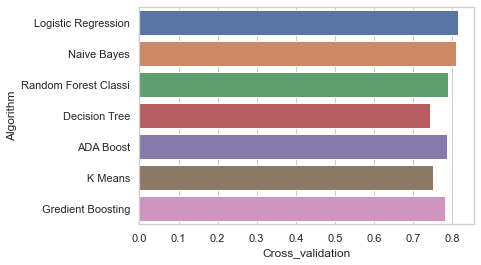

In [191]:
# Algorithm performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Cross_validation",data=final_card)

### Logistic Regression Has the best performance

### Hyperparametric Tuning

#### Grid Search Cv

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
penalty = ["l1","l2","elasticnet"]
solver = ["newton-cg","lbfgs","liblinear","sag","saga"]
C = [100, 10, 1.0, 0.1, 0.01]
multi_class = ["auto","ovr","multinomial"]
dual=[True,False]
fit_intercept=[True,False]

In [195]:
penalty = ["l1","l2","elasticnet"]
solver = ["newton-cg","lbfgs","liblinear","sag","saga"]
C = [100, 10, 1.0, 0.1, 0.01]
multi_class = ["auto","ovr","multinomial"]

In [196]:
parameters = {
    "penalty":penalty,
    "solver":solver,
    "C":C,
    "multi_class":multi_class
   }

In [197]:
print(parameters)

{'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [100, 10, 1.0, 0.1, 0.01], 'multi_class': ['auto', 'ovr', 'multinomial']}


In [198]:
lr = LogisticRegression()

In [199]:
grid_search=GridSearchCV(estimator=lr,param_grid=parameters,cv=3,n_jobs=-1,verbose=2)

In [200]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 225 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:    7.2s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

#### Best Estimators

In [201]:
grid_search.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

#### Best Parameters

In [202]:
grid_search.best_params_

{'C': 1.0, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}

#### Best Score

In [203]:
grid_search.best_score_

0.8032407407407408

In [204]:
predictions = grid_search.predict(X_test)

#### Confusion Matrix

In [205]:
print(confusion_matrix(y_test,predictions))
print("\n")

[[ 22  20]
 [  0 103]]




#### Classification Report

In [206]:
print(classification_report(y_test,predictions))
print("\n")

              precision    recall  f1-score   support

           0       1.00      0.52      0.69        42
           1       0.84      1.00      0.91       103

    accuracy                           0.86       145
   macro avg       0.92      0.76      0.80       145
weighted avg       0.88      0.86      0.85       145





In [207]:
grid_search

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

#### ROC AUC CURVE

In [208]:
from sklearn.metrics import roc_curve,roc_auc_score

In [209]:
y_pred_prob = grid_search.predict_proba(X_test)[:,1]

In [210]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

In [211]:
fpr

array([0.        , 0.        , 0.        , 0.02380952, 0.02380952,
       0.04761905, 0.04761905, 0.07142857, 0.07142857, 0.0952381 ,
       0.0952381 , 0.11904762, 0.11904762, 0.14285714, 0.14285714,
       0.16666667, 0.16666667, 0.19047619, 0.19047619, 0.21428571,
       0.21428571, 0.23809524, 0.23809524, 0.26190476, 0.26190476,
       0.30952381, 0.30952381, 0.33333333, 0.33333333, 0.35714286,
       0.35714286, 0.38095238, 0.38095238, 0.47619048, 0.47619048,
       1.        ])

In [212]:
tpr

array([0.        , 0.00970874, 0.23300971, 0.23300971, 0.2815534 ,
       0.2815534 , 0.33009709, 0.33009709, 0.34951456, 0.34951456,
       0.44660194, 0.44660194, 0.46601942, 0.46601942, 0.49514563,
       0.49514563, 0.51456311, 0.51456311, 0.68932039, 0.68932039,
       0.69902913, 0.69902913, 0.72815534, 0.72815534, 0.88349515,
       0.88349515, 0.89320388, 0.89320388, 0.90291262, 0.90291262,
       0.91262136, 0.91262136, 0.95145631, 0.95145631, 1.        ,
       1.        ])

In [213]:
thresholds

array([1.90602046, 0.90602046, 0.84187624, 0.84109224, 0.83196079,
       0.8291232 , 0.81879435, 0.81854137, 0.81303351, 0.8122132 ,
       0.80026779, 0.79916587, 0.79819139, 0.79717252, 0.79649502,
       0.79621638, 0.79015593, 0.78930761, 0.74556061, 0.74322626,
       0.74077595, 0.73630477, 0.73007838, 0.72985724, 0.70609285,
       0.69498834, 0.69349354, 0.68969874, 0.68919393, 0.68731091,
       0.68391383, 0.68312114, 0.65235559, 0.62345071, 0.59454923,
       0.0565171 ])

Text(0.5, 1.0, 'Logistic Regression Algorithm')

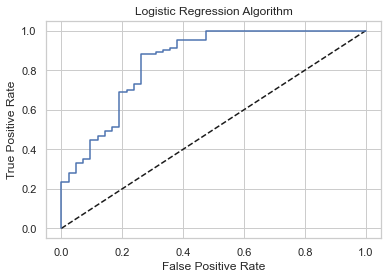

In [214]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Algorithm')

#### Whith the help of ROC,AUC curve we can say that the model is performing good

## Saving the model using Pickle

In [215]:
import pickle

In [216]:
with open("model_pickle","wb") as f:
    
    pickle.dump(grid_search,f)

In [217]:
with open("model_pickle","rb") as f:
    
    loan = pickle.load(f)

## Conclusion

#### Using the model to predict a single value

In [218]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.859812,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,7.857094,7.765993,4.795791,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,8.699681,0.000000,4.955827,360.0,1.0,1,1,0,0,0,0,0,0,0,1


#### The model needs to predict 1 i.e the loan status approved
#### for this inputs

In [219]:
df.iloc[0,0:].values

array([  8.67419694,   0.        ,   4.8598124 , 360.        ,
         1.        ,   1.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.        ])

In [220]:
loan.predict(sc.transform([[8.67419694,   0.        ,   4.8598124 , 360.        ,
         1.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.]]))

array([1], dtype=int64)

### The model predicted right for this individual value

In [221]:
cm = confusion_matrix(y_test,predictions)

<AxesSubplot:>

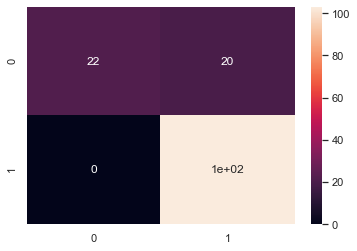

In [222]:
sns.heatmap(data=cm,annot=True)

In [223]:
# Comparing predicted value vs actual value
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]

### Most of the predictions are right